# Imports

In [7]:
%load_ext autoreload
%autoreload 2

import datetime as dt
import numpy as np
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 99)
import pandas_bokeh
pandas_bokeh.output_file("bokeh_output.html")
# import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = [20, 7]

# import pdb; pdb.set_trace()
# import pudb; pudb.set_trace()

# .describe(include='all', datetime_is_numeric=True)
# df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)  # 'Blues', 'coolwarm', 'RdBu_r' & 'BrBG'
# pd.set_option('precision', 2)
# .plot_bokeh(sizing_mode="scale_height")
# .plot_bokeh(kind='hist', bins=1000, sizing_mode="scale_height", xlim=[0, .1])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sample tick dates

In [4]:
from bar_sampler import meta, sampler, stacked


thresh = {
    # meta params
    'symbol': 'GLD',
    'start_date': '2020-01-10',
    'end_date': '2020-01-20',
    # filter
    'mad_value_winlen': 22,
    'mad_deviation_winlen': 1111,
    'mad_k': 17,
    'jma_winlen': 7,
    'jma_power': 2,
    # time batcher
    'batch_freq': '3s',
    # bar sampler params
    'renko_return': 'price_jma_return',
    'renko_size': 0.1,
    'renko_reveral_multiple': 2,
    'renko_range_frac': 22,
    'max_duration_td': dt.timedelta(minutes=33),
    'min_duration_td': dt.timedelta(seconds=33),
    'min_tick_count': 33,
    # label params
    'add_label': True,
    'reward_ratios': list(np.arange(2, 11, 0.5)),
}

In [3]:

bd = meta.get_bar_date(thresh, date='2019-01-02')


In [ ]:

bds = meta.get_bar_dates(thresh, ray_on=True)


<AxesSubplot:>

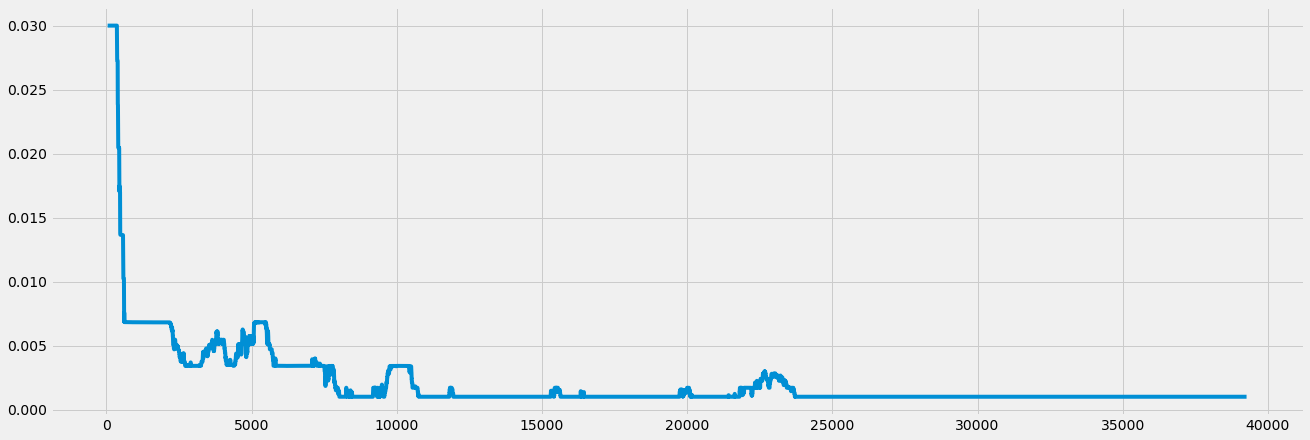

In [34]:
n = 5

bds[n]['ticks_df'].price_median_diff_median.plot()

<AxesSubplot:>

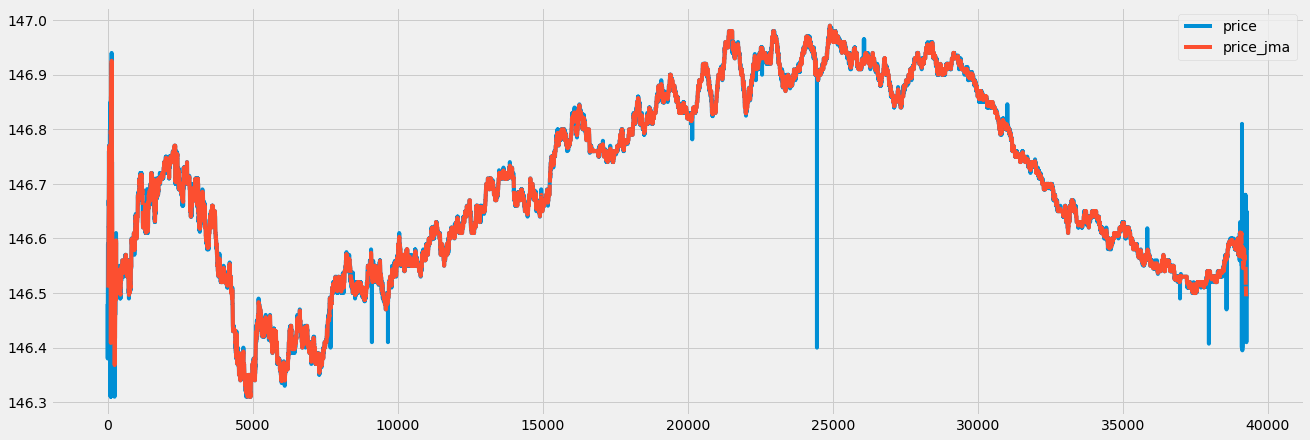

In [35]:
bds[n]['ticks_df'][['price', 'price_jma']].plot()

<AxesSubplot:xlabel='nyc_dt'>

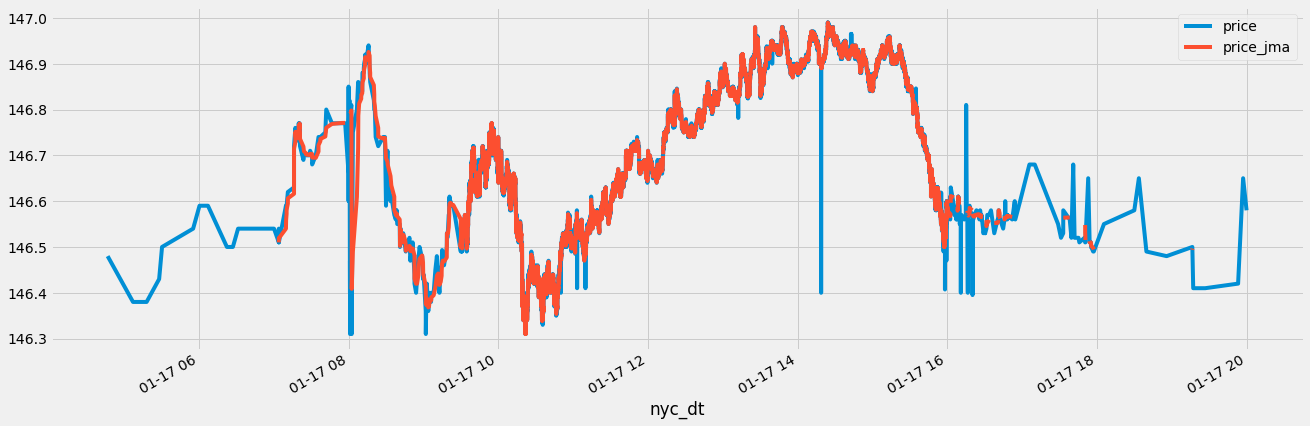

In [36]:
bds[n]['ticks_df'].set_index('nyc_dt')[['price', 'price_jma']].plot()

In [61]:
# fill daily gaps
stacked_df = stacked.fill_gaps_dates(bds, fill_col='price_vwap')

stacked_df[['price_high','price_low','price_vwap']].plot_bokeh(sizing_mode="scale_height")

Figure(id='1002', ...)

In [ ]:
stacked_df

In [ ]:
# stacked stats
stats_df = stacked.stacked_df_stats(stacked_df)

stats_df

stats_df.describe()

In [ ]:
results = []

for date in bar_dates:
    out = (date['ticks_df'].status.value_counts() / date['ticks_df'].shape[0]).to_dict()
    out.update({'date': date['date']})
    results.append(out)

pd.DataFrame(results)